# Import Libraries and Data

In [1]:
# Load libraries
import pandas as pd
import numpy as np
from sklearn.tree import DecisionTreeClassifier # Import Decision Tree Classifier
from sklearn.model_selection import train_test_split # Import train_test_split function
from sklearn import metrics
import matplotlib.pyplot as plt
from sklearn.externals.six import StringIO  
from sklearn.tree import DecisionTreeRegressor, export_graphviz

c:\users\farshid\appdata\local\programs\python\python37\lib\site-packages\sklearn\externals\six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)


In [2]:
df = pd.read_csv(r"D:\crux\mockdata\sample.csv")

In [3]:
df.head()

,id_calim,claim_amount,status,id_policy,policy_number,start_date,expiry_date,mhd_flag,coverage_amount,premium,cool_down_period,id_customer,name_customer,id_product,title_product,product_type,description_product
0,af20f7a2-ded4-4251-b087-abd0cecc0b75,53000,2,15c46638-119e-4965-90fd-b773c42afbbb,39581,17/5/2020,8/6/2020,False,94936,300.8,35,e146e8af-1547-4499-9461-570ef7ec8bc9,Customer2,8eea798b-0685-44b7-8355-b1fbd8be7c83,Health Plus,2,Some description
1,49037262-e660-4d22-8fab-1d5d83e25e86,70000,2,28d7dc37-e397-4a5c-8b08-46b31a795438,50580,2/5/2020,31/5/2020,False,80000,300.8,87,367d5017-ae7d-45d7-a796-382ec28e7bd5,Customer5,8eea798b-0685-44b7-8355-b1fbd8be7c83,Health Plus,2,Some description
2,6f94d0d0-b539-4116-b2fe-11fae0d21e45,26000,2,8bc5bc20-8c8b-48c2-9ef6-00880665fb92,16293,21/5/2020,18/6/2020,True,49000,300.6,87,3c0b75e9-5eb2-42bc-8bdd-d052ee90234e,Customer6,3038193c-bda6-4698-91ee-10f7c14f1db2,health plus3,2,string
3,971a49f0-e5fb-490a-ba86-ed91344b109a,77000,1,6d327810-9369-4cae-bb82-84d379929cd4,22095,5/6/2020,24/7/2020,True,70000,200.1,12,367d5017-ae7d-45d7-a796-382ec28e7bd5,Customer5,8eea798b-0685-44b7-8355-b1fbd8be7c83,Health Plus,2,Some description
4,badfac48-5741-4d41-affe-adc7cb2b6347,10000,2,d269e843-897d-4b18-bef5-cde45059d5d4,37328,7/7/2020,25/7/2020,True,20000,100.7,11,367d5017-ae7d-45d7-a796-382ec28e7bd5,Customer5,8eea798b-0685-44b7-8355-b1fbd8be7c83,Health Plus,2,Some description


In [4]:
import random
list(df.values)[random.randint(0,len(list(df.values)))]
# random(list(df.values))

array(['a48c594e-9f97-4c0f-8593-91fa864ed7c3', 38000, 2,
       '5cc4b516-618e-4edd-bf33-d336e9912da8', 51634, '13/4/2020',
       '28/4/2020', True, 74000, 300.2, 11,
       '367d5017-ae7d-45d7-a796-382ec28e7bd5', 'Customer5',
       '16c15b12-9eb5-4dd0-a7c7-a674a569bab3', 'health plus4', 2,
       'string'], dtype=object)

In [5]:
df.columns

Index(['id_calim', 'claim_amount', 'status', 'id_policy', 'policy_number',
       'start_date', 'expiry_date', 'mhd_flag', 'coverage_amount', 'premium',
       'cool_down_period', 'id_customer', 'name_customer', 'id_product',
       'title_product', 'product_type', 'description_product'],
      dtype='object')

In [6]:
df.describe()

,claim_amount,status,policy_number,coverage_amount,premium,cool_down_period,product_type
count,107.000000,107.000000,107.000000,107.000000,107.000000,107.000000,107.000000
mean,56186.915888,1.523364,58781.439252,55419.962617,196.758879,49.813084,2.532710
std,25990.974791,0.501804,24421.227284,26001.635046,78.794531,27.972065,0.804677
min,10000.000000,1.000000,12215.000000,10000.000000,100.100000,2.000000,2.000000
25%,37000.000000,1.000000,39771.000000,34000.000000,100.750000,25.500000,2.000000
50%,58000.000000,2.000000,60879.000000,55000.000000,200.400000,55.000000,2.000000
75%,78000.000000,2.000000,77984.000000,77000.000000,300.200000,72.000000,3.000000
max,98000.000000,2.000000,99957.000000,98000.000000,300.900000,100.000000,4.000000


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 107 entries, 0 to 106
Data columns (total 17 columns):
id_calim               107 non-null object
claim_amount           107 non-null int64
status                 107 non-null int64
id_policy              107 non-null object
policy_number          107 non-null int64
start_date             107 non-null object
expiry_date            107 non-null object
mhd_flag               107 non-null bool
coverage_amount        107 non-null int64
premium                107 non-null float64
cool_down_period       107 non-null int64
id_customer            107 non-null object
name_customer          107 non-null object
id_product             107 non-null object
title_product          107 non-null object
product_type           107 non-null int64
description_product    107 non-null object
dtypes: bool(1), float64(1), int64(6), object(9)
memory usage: 13.6+ KB


# Visualize Data

In [7]:
df['start_date_year']=df['start_date'].dt.year
df['start_date_month']=df['start_date'].dt.month
df['start_date_week']=df['start_date'].dt.week
df['start_date_day']=df['start_date'].dt.day
df['expiry_date_year']=df['expiry_date'].dt.year
df['expiry_date_month']=df['expiry_date'].dt.month
df['expiry_date_week']=df['expiry_date'].dt.week
df['expiry_date_day']=df['expiry_date'].dt.day
fig = plt.figure()
ax1 = fig.add_subplot(1, 2, 1)
ax2 = fig.add_subplot(1, 2, 2)
# fig_size = plt.rcParams["figure.figsize"]
# plt.rcParams["figure.figsize"] = (14,10)

font = {'family': 'serif',
        'color':  'k',
        'weight': 'normal',
        'size': 16,
        }
ax1.scatter(x=df['expiry_date_month'], y=df['coverage_amount'], c=df['status_new'],  s=80, alpha=0.5, cmap='viridis')
ax1.set_title("expire date",
          fontdict=font)
ax1.set_xlabel("expire date month", fontdict=font)
ax1.set_ylabel("coverage_amount", fontdict=font)




ax2.scatter(x=df['coverage_amount'], y=df['claim_amount'], c=df['status_new'], s=80, alpha=0.5, cmap='cividis')
ax2.set_title("'claim_amount'",
          fontdict=font)
ax2.set_xlabel("coverage_amount", fontdict=font)
ax2.set_ylabel("claim_amount", fontdict=font)


plt.show()

AttributeError: Can only use .dt accessor with datetimelike values

# Feature Engineering

In [8]:
df['start_date']=pd.to_datetime(df['start_date'], 
 format = "%d/%m/%Y")
# "%Y-%m-%dT%H:%M.%SZ"

In [9]:
list(df.columns)


['id_calim',
 'claim_amount',
 'status',
 'id_policy',
 'policy_number',
 'start_date',
 'expiry_date',
 'mhd_flag',
 'coverage_amount',
 'premium',
 'cool_down_period',
 'id_customer',
 'name_customer',
 'id_product',
 'title_product',
 'product_type',
 'description_product']

In [10]:
df['expiry_date']=pd.to_datetime(df['expiry_date'], 
 format = "%d/%m/%Y")

In [11]:
df['start_date_year']=df['start_date'].dt.year
df['start_date_month']=df['start_date'].dt.month
df['start_date_week']=df['start_date'].dt.week
df['start_date_day']=df['start_date'].dt.day
df['expiry_date_year']=df['expiry_date'].dt.year
df['expiry_date_month']=df['expiry_date'].dt.month
df['expiry_date_week']=df['expiry_date'].dt.week
df['expiry_date_day']=df['expiry_date'].dt.day

In [12]:
from datetime import date,datetime

today = date.today()
type ( today.day )
today.day

20

In [13]:
list(df.columns).index('expiry_date_month')

22

In [14]:
status_new = [] 
for idx,item in enumerate(df.values ) :

    if item[list(df.columns).index('status')]==1 and (item[list(df.columns).index('expiry_date_month')] <= today.month )and (today.day <= item[list(df.columns).index('expiry_date_day')]): 
#         print(item[list(df.columns).index('expiry_date_month')])
        status_new.append(2)
    else :
        status_new.append(item[2])


In [15]:
df['status_new'] = status_new

In [16]:
df['status'].value_counts()

2    56
1    51
Name: status, dtype: int64

In [17]:
df['status_new'].value_counts()

2    66
1    41
Name: status_new, dtype: int64

In [18]:
df['product_type'].value_counts()

2    71
4    21
3    15
Name: product_type, dtype: int64

In [19]:
df['mhd_flag'].value_counts()

True     56
False    51
Name: mhd_flag, dtype: int64

In [20]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
le.fit(df['mhd_flag'])
le.classes_
df['mhd_flag']=le.transform(df['mhd_flag'])

# Split Data for Train and Test

In [21]:
#split dataset in features and target variable
feature_cols = ['claim_amount', 
       'mhd_flag', 'coverage_amount', 'premium',
       'cool_down_period',
       'product_type', 
       'start_date_month',
       'start_date_day', 'expiry_date_month',
        'expiry_date_day']
X = df[feature_cols] # Features
y = df['status_new']# Target variable

In [22]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1) # 70% training and 30% test

# Decision Tree

In [23]:
# Create Decision Tree classifer object
clf = DecisionTreeClassifier()

# Train Decision Tree Classifer
clf = clf.fit(X_train,y_train)

#Predict the response for test dataset
y_pred = clf.predict(X_test)

In [24]:
####accuracy 
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.8636363636363636


# Visualize Tree

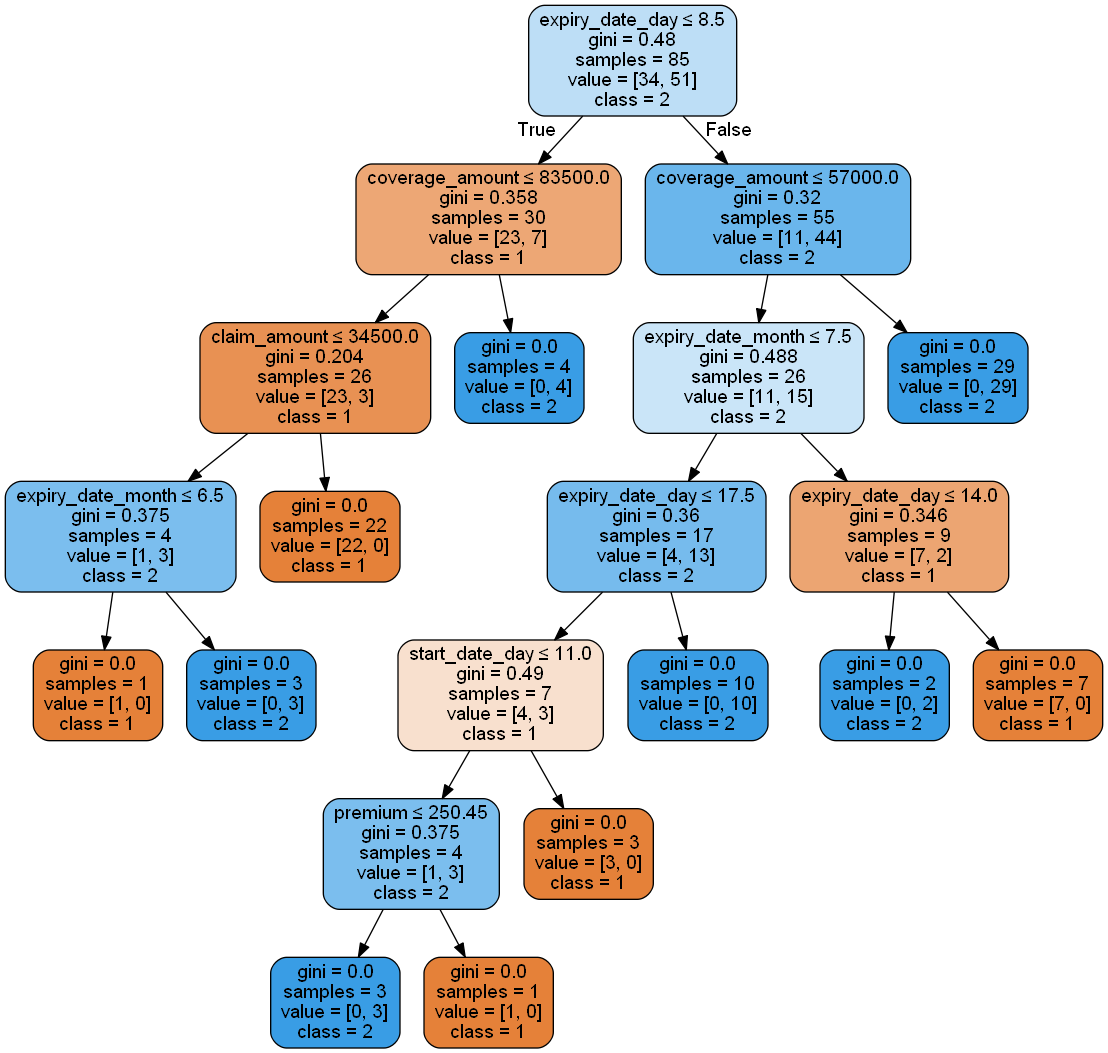

In [25]:
from sklearn.tree import export_graphviz
from sklearn.externals.six import StringIO  
from IPython.display import Image  
import pydotplus
dot_data = StringIO()
export_graphviz(clf, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True,feature_names = feature_cols,class_names=['1','2'])
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph.write_png('policy.png')
Image(graph.create_png())

In [28]:

from sklearn.tree.export import export_text

c:\users\farshid\appdata\local\programs\python\python37\lib\site-packages\sklearn\utils\deprecation.py:144: FutureWarning: The sklearn.tree.export module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.tree. Anything that cannot be imported from sklearn.tree is now part of the private API.
  warnings.warn(message, FutureWarning)


In [32]:
export_text(clf, feature_names=feature_cols)

'|--- expiry_date_day <= 8.50\n|   |--- coverage_amount <= 83500.00\n|   |   |--- claim_amount <= 34500.00\n|   |   |   |--- expiry_date_month <= 6.50\n|   |   |   |   |--- class: 1\n|   |   |   |--- expiry_date_month >  6.50\n|   |   |   |   |--- class: 2\n|   |   |--- claim_amount >  34500.00\n|   |   |   |--- class: 1\n|   |--- coverage_amount >  83500.00\n|   |   |--- class: 2\n|--- expiry_date_day >  8.50\n|   |--- coverage_amount <= 57000.00\n|   |   |--- expiry_date_month <= 7.50\n|   |   |   |--- expiry_date_day <= 17.50\n|   |   |   |   |--- start_date_day <= 11.00\n|   |   |   |   |   |--- premium <= 250.45\n|   |   |   |   |   |   |--- class: 2\n|   |   |   |   |   |--- premium >  250.45\n|   |   |   |   |   |   |--- class: 1\n|   |   |   |   |--- start_date_day >  11.00\n|   |   |   |   |   |--- class: 1\n|   |   |   |--- expiry_date_day >  17.50\n|   |   |   |   |--- class: 2\n|   |   |--- expiry_date_month >  7.50\n|   |   |   |--- expiry_date_day <= 14.00\n|   |   |   | 

In [33]:
import sklearn.tree as tr

In [ ]:
def treeToJson(decision_tree, feature_names=None):
      from warnings import warn

      js = ""

      def node_to_str(tree, node_id, criterion):
            if not isinstance(criterion, sklearn.tree.tree.six.string_types):
                  criterion = "impurity"

            value = tree.value[node_id]
            if tree.n_outputs == 1:
                  value = value[0, :]

            jsonValue = ', '.join([str(x) for x in value])

            if tree.children_left[node_id] == sklearn.tree._tree.TREE_LEAF:
                  return '"id": "%s", "criterion": "%s", "impurity": "%s", "samples": "%s", "value": [%s]' \
                     % (node_id, 
                        criterion,
                        tree.impurity[node_id],
                        tree.n_node_samples[node_id],
                        jsonValue)
            else:
              if feature_names is not None:
                feature = feature_names[tree.feature[node_id]]
              else:
                feature = tree.feature[node_id]

              if "=" in feature:
                ruleType = "="
                ruleValue = "false"
              else:
                ruleType = "<="
                ruleValue = "%.4f" % tree.threshold[node_id]

              return '"id": "%s", "rule": "%s %s %s", "%s": "%s", "samples": "%s"' \
                     % (node_id, 
                        feature,
                        ruleType,
                        ruleValue,
                        criterion,
                        tree.impurity[node_id],
                        tree.n_node_samples[node_id])

          def recurse(tree, node_id, criterion, parent=None, depth=0):
            tabs = "  " * depth
            js = ""

            left_child = tree.children_left[node_id]
            right_child = tree.children_right[node_id]

            js = js + "\n" + \
                 tabs + "{\n" + \
                 tabs + "  " + node_to_str(tree, node_id, criterion)

            if left_child != sklearn.tree._tree.TREE_LEAF:
              js = js + ",\n" + \
                   tabs + '  "left": ' + \
                   recurse(tree, \
                           left_child, \
                           criterion=criterion, \
                           parent=node_id, \
                           depth=depth + 1) + ",\n" + \
                   tabs + '  "right": ' + \
                   recurse(tree, \
                           right_child, \
                           criterion=criterion, \
                           parent=node_id,
                           depth=depth + 1)

            js = js + tabs + "\n" + \
                 tabs + "}"

            return js

          if isinstance(decision_tree, sklearn.tree.tree.Tree):
            js = js + recurse(decision_tree, 0, criterion="impurity")
          else:
            js = js + recurse(decision_tree.tree_, 0, criterion=decision_tree.criterion)

          return js

In [ ]:
from json import dumps
from BeautifulSoup import BeautifulSoup

def run_from_command_line():
  import argparse
  parser = argparse.ArgumentParser(description='Convert SVG files to JSON.')
  parser.add_argument('svg_files', metavar='S', type=file, nargs='+', help='input SVG files')
  parser.add_argument('--elements', default=['id'], metavar='E', type=str, nargs='*', help='elements to extract')
  args = parser.parse_args()
  convert_svg_files_to_json(args.svg_files, args.elements)

def convert_svg_files_to_json(svg_files, elements):
  for svg_file in svg_files:
    json = convert_svg_file_to_json(svg_file, elements)
    open(svg_file.name + '.json', 'w').write(json)

def convert_svg_file_to_json(svg_file, elements):
  dicts = []
  svg = svg_file.read()
  soup = BeautifulSoup(svg, selfClosingTags=['defs', 'sodipodi:namedview'])
  for path in soup.findAll('path'):
    path_dict = {k:path[k] for k in elements if k in dict(path.attrs)}
    if len(path_dict) > 0:
      dicts.append(path_dict)
  return dumps(dicts)

if __name__ == '__main__':
  run_from_command_line()

[Text(156.24, 199.32, 'X[9] <= 8.5\ngini = 0.484\nsamples = 85\nvalue = [35, 50]'),
 Text(89.28, 163.07999999999998, 'X[2] <= 83500.0\ngini = 0.358\nsamples = 30\nvalue = [23, 7]'),
 Text(66.96000000000001, 126.83999999999999, 'X[0] <= 34500.0\ngini = 0.204\nsamples = 26\nvalue = [23, 3]'),
 Text(44.64, 90.6, 'X[7] <= 3.0\ngini = 0.375\nsamples = 4\nvalue = [1, 3]'),
 Text(22.32, 54.359999999999985, 'gini = 0.0\nsamples = 1\nvalue = [1, 0]'),
 Text(66.96000000000001, 54.359999999999985, 'gini = 0.0\nsamples = 3\nvalue = [0, 3]'),
 Text(89.28, 90.6, 'gini = 0.0\nsamples = 22\nvalue = [22, 0]'),
 Text(111.6, 126.83999999999999, 'gini = 0.0\nsamples = 4\nvalue = [0, 4]'),
 Text(223.2, 163.07999999999998, 'X[8] <= 6.5\ngini = 0.341\nsamples = 55\nvalue = [12, 43]'),
 Text(156.24, 126.83999999999999, 'X[2] <= 11500.0\ngini = 0.128\nsamples = 29\nvalue = [2, 27]'),
 Text(133.92000000000002, 90.6, 'gini = 0.0\nsamples = 1\nvalue = [1, 0]'),
 Text(178.56, 90.6, 'X[4] <= 4.5\ngini = 0.069\nsamp

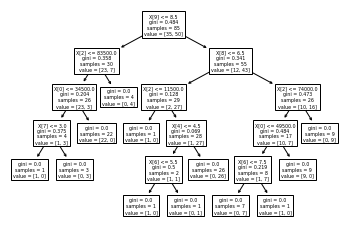

In [84]:
from sklearn import tree
tree.plot_tree(clf)

In [34]:
import sklearn_json as skljson

In [35]:
skljson.to_json(clf, 'out.json')

In [38]:
from sklearn import tree 
a =tree.export_graphviz(clf)

In [41]:
a.splitlines()

['digraph Tree {',
 'node [shape=box] ;',
 '0 [label="X[9] <= 8.5\\ngini = 0.48\\nsamples = 85\\nvalue = [34, 51]"] ;',
 '1 [label="X[2] <= 83500.0\\ngini = 0.358\\nsamples = 30\\nvalue = [23, 7]"] ;',
 '0 -> 1 [labeldistance=2.5, labelangle=45, headlabel="True"] ;',
 '2 [label="X[0] <= 34500.0\\ngini = 0.204\\nsamples = 26\\nvalue = [23, 3]"] ;',
 '1 -> 2 ;',
 '3 [label="X[8] <= 6.5\\ngini = 0.375\\nsamples = 4\\nvalue = [1, 3]"] ;',
 '2 -> 3 ;',
 '4 [label="gini = 0.0\\nsamples = 1\\nvalue = [1, 0]"] ;',
 '3 -> 4 ;',
 '5 [label="gini = 0.0\\nsamples = 3\\nvalue = [0, 3]"] ;',
 '3 -> 5 ;',
 '6 [label="gini = 0.0\\nsamples = 22\\nvalue = [22, 0]"] ;',
 '2 -> 6 ;',
 '7 [label="gini = 0.0\\nsamples = 4\\nvalue = [0, 4]"] ;',
 '1 -> 7 ;',
 '8 [label="X[2] <= 57000.0\\ngini = 0.32\\nsamples = 55\\nvalue = [11, 44]"] ;',
 '0 -> 8 [labeldistance=2.5, labelangle=-45, headlabel="False"] ;',
 '9 [label="X[8] <= 7.5\\ngini = 0.488\\nsamples = 26\\nvalue = [11, 15]"] ;',
 '8 -> 9 ;',
 '10 [label=

# Class Prediction 

In [85]:
clf.predict(np.array([list(X_test.values[1])]))

array([1], dtype=int64)

In [86]:
X_test.values[10]

array([6.500e+04, 1.000e+00, 7.700e+04, 2.006e+02, 2.900e+01, 2.000e+00,
       4.000e+00, 2.800e+01, 6.000e+00, 1.000e+01])

# Feature Correlation

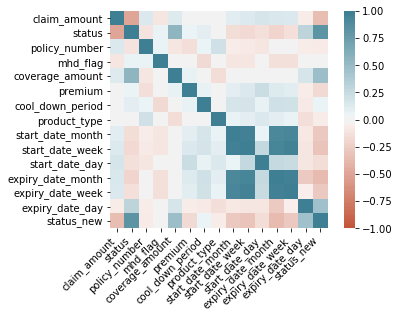

In [87]:
import seaborn as sns
df1 = df.drop(['start_date_year', 'expiry_date_year'], axis=1)
corr = df1.corr()
ax = sns.heatmap(
    corr, 
    vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(20, 220, n=200),
    square=True
)
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=45,
    horizontalalignment='right'
);

In [89]:
# Get angles from 0 to 360 
# cols = list(corr.columns)
# data = list(abs(corr['status']))
angles=np.linspace(0, 2*np.pi, len(cols), endpoint=False) 
# Concat first element of data points to the end to make it full circle
stats=np.concatenate((data,[data[0]]))
angles=np.concatenate((angles,[angles[0]]))

# Radar chart
fig = plt.figure()
ax = fig.add_subplot(111, polar=True)
# Setting polar=true to enable polar coordinates
ax.plot(angles, stats, "o-")
ax.fill(angles, stats, alpha=0.25)
ax.set_thetagrids(angles * 180/np.pi, cols)    
plt.title('correlation')
plt.show()

NameError: name 'cols' is not defined

In [ ]:
# cols = list(corr.columns)
# cols.remove('status')
len(cols)
# data = list(abs(corr['status']))
# # data.remove(0.8096578292153518)
# len(data)

# Model Selection

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=2, p=2,
                     weights='uniform')


c:\users\farshid\appdata\local\programs\python\python37\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; This will be removed in v0.5.0. Please use scikitplot.metrics.plot_roc instead.
  warnings.warn(msg, category=FutureWarning)


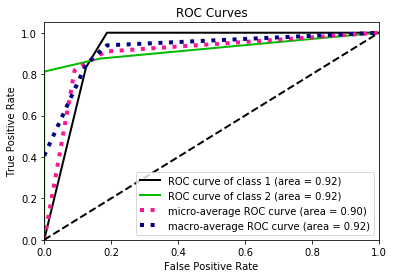

SVC(C=0.5, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=True, random_state=None, shrinking=True, tol=0.001,
    verbose=False)


c:\users\farshid\appdata\local\programs\python\python37\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; This will be removed in v0.5.0. Please use scikitplot.metrics.plot_roc instead.
  warnings.warn(msg, category=FutureWarning)


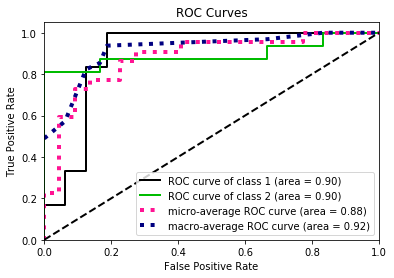

NuSVC(break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
      decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
      max_iter=-1, nu=0.5, probability=True, random_state=None, shrinking=True,
      tol=0.001, verbose=False)


c:\users\farshid\appdata\local\programs\python\python37\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; This will be removed in v0.5.0. Please use scikitplot.metrics.plot_roc instead.
  warnings.warn(msg, category=FutureWarning)


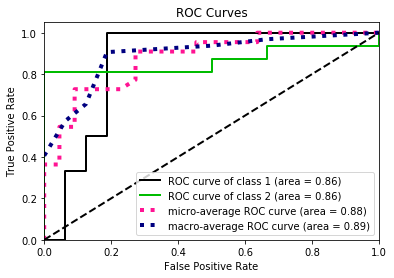

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')


c:\users\farshid\appdata\local\programs\python\python37\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; This will be removed in v0.5.0. Please use scikitplot.metrics.plot_roc instead.
  warnings.warn(msg, category=FutureWarning)


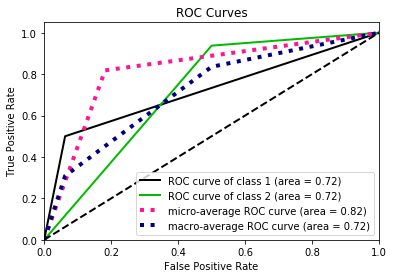

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)


c:\users\farshid\appdata\local\programs\python\python37\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; This will be removed in v0.5.0. Please use scikitplot.metrics.plot_roc instead.
  warnings.warn(msg, category=FutureWarning)


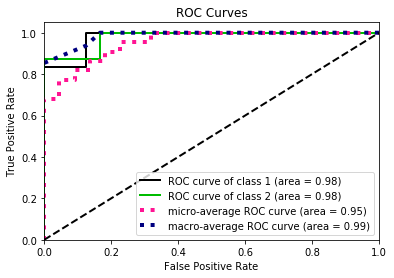

AdaBoostClassifier(algorithm='SAMME.R', base_estimator=None, learning_rate=1.0,
                   n_estimators=50, random_state=None)


c:\users\farshid\appdata\local\programs\python\python37\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; This will be removed in v0.5.0. Please use scikitplot.metrics.plot_roc instead.
  warnings.warn(msg, category=FutureWarning)


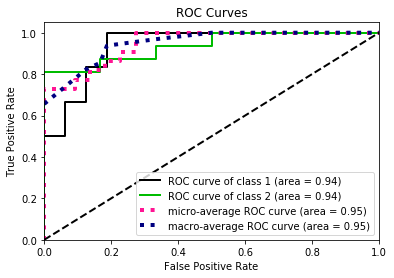

GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                           learning_rate=0.1, loss='deviance', max_depth=3,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=1, min_samples_split=2,
                           min_weight_fraction_leaf=0.0, n_estimators=100,
                           n_iter_no_change=None, presort='deprecated',
                           random_state=None, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)


c:\users\farshid\appdata\local\programs\python\python37\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; This will be removed in v0.5.0. Please use scikitplot.metrics.plot_roc instead.
  warnings.warn(msg, category=FutureWarning)


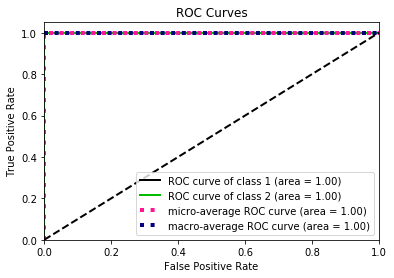

In [90]:
from sklearn.pipeline import Pipeline
import scikitplot as skplt
from sklearn.metrics import roc_curve, auc
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.metrics import accuracy_score, log_loss
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC, LinearSVC, NuSVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
# n_classes = y.shape[1]
# fig = plt.figure()
# ax1 = fig.add_subplot(1, 4, 1)
# ax2 = fig.add_subplot(1, 4, 2)
# ax3 = fig.add_subplot(1, 4, 3)
# ax4 = fig.add_subplot(1, 4, 4)
# ax5 = fig.add_subplot(2, 4, 1)
# ax6 = fig.add_subplot(2, 4, 2)
# ax7 = fig.add_subplot(2, 4, 3)
# ax8 = fig.add_subplot(2, 4, 4)

classifiers = [
    KNeighborsClassifier(2),
    SVC(kernel='rbf', C=0.5, probability=True),
    NuSVC(probability=True),
    DecisionTreeClassifier(),
    RandomForestClassifier(),
    AdaBoostClassifier(),
    GradientBoostingClassifier()
    ]

for classifier in classifiers:
    pipe = Pipeline(steps=[
                      ('classifier', classifier)])
    pipe.fit(X_train, y_train)   
    print(classifier)
    y_probas=list(pipe.predict_proba(X_test))
#     print("model score: %.3f" % pipe.score(X_test, y_test))
    skplt.metrics.plot_roc_curve(list(y_test), list(y_probas))

    plt.show()


In [48]:
list(pipe.predict_proba(X_test))

[array([0., 1.]),
 array([1., 0.]),
 array([0., 1.]),
 array([0., 1.]),
 array([0.5, 0.5]),
 array([0., 1.]),
 array([1., 0.]),
 array([0., 1.]),
 array([0., 1.]),
 array([0., 1.]),
 array([0., 1.]),
 array([0., 1.]),
 array([1., 0.]),
 array([0., 1.]),
 array([0.5, 0.5]),
 array([1., 0.]),
 array([1., 0.]),
 array([1., 0.]),
 array([1., 0.]),
 array([0., 1.]),
 array([0., 1.]),
 array([0., 1.])]

In [49]:
y_test

67     2
35     1
73     2
62     2
39     1
53     2
56     2
88     2
31     2
59     2
101    2
78     2
94     1
65     2
33     2
91     1
38     2
95     1
17     1
102    2
89     2
85     2
Name: status_new, dtype: int64

# Feature Importance 

In [191]:
from sklearn.ensemble import ExtraTreesClassifier
# feature extraction
model = ExtraTreesClassifier(n_estimators=len(X.values[0]))
model.fit(X, y)
for i in range(len(list(X.columns))):
    print('Importance of ',list(X.columns)[i],': ',model.feature_importances_[i])

Importance of  claim_amount :  0.2540268501616058
Importance of  mhd_flag :  0.02615460245511937
Importance of  coverage_amount :  0.24808505709511847
Importance of  premium :  0.07043222744222868
Importance of  cool_down_period :  0.06840328329514024
Importance of  product_type :  0.0364167527965935
Importance of  start_date_month :  0.05696632311808163
Importance of  start_date_day :  0.061702888459962725
Importance of  expiry_date_month :  0.050002331154211245
Importance of  expiry_date_day :  0.12780968402193832


In [192]:
import numpy as np
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2    #target column i.e price range
#apply SelectKBest class to extract top 10 best features
bestfeatures = SelectKBest(score_func=chi2, k=10)
fit = bestfeatures.fit(X,y)
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(X.columns)
#concat two dataframes for better visualization 
featureScores = pd.concat([dfcolumns,dfscores],axis=1)
featureScores.columns = ['Specs','Score']  #naming the dataframe columns
print(featureScores.nlargest(10,'Score')) 

               Specs          Score
2    coverage_amount  395021.980651
0       claim_amount  303327.764639
9    expiry_date_day      59.675969
4   cool_down_period      12.606724
7     start_date_day       8.882932
3            premium       8.574197
8  expiry_date_month       1.472428
6   start_date_month       0.765947
1           mhd_flag       0.204838
5       product_type       0.000419


[0.25228449 0.02521044 0.29778873 0.05387627 0.06835392 0.03340647
 0.05198918 0.05727535 0.04857408 0.11124108]


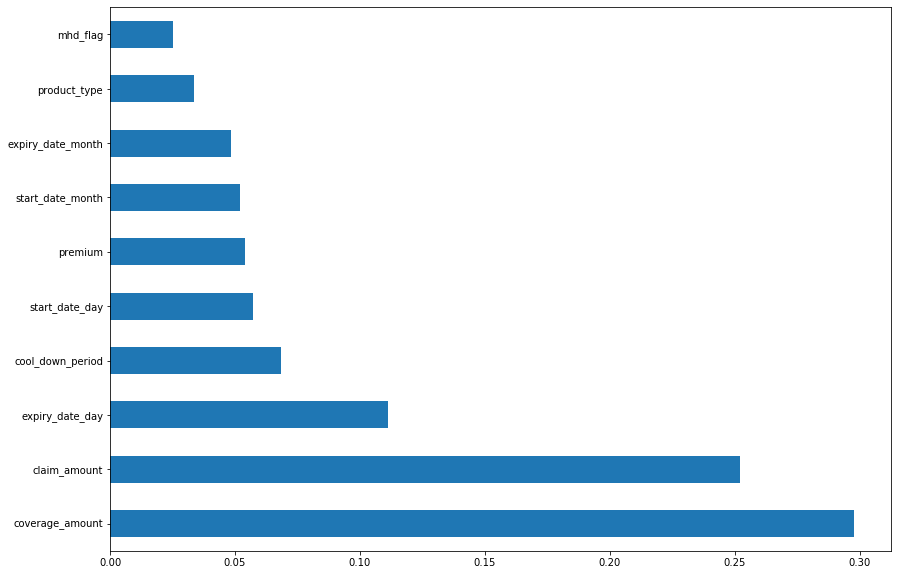

In [193]:

from sklearn.ensemble import ExtraTreesClassifier
import matplotlib.pyplot as plt
model = ExtraTreesClassifier()
model.fit(X,y)
print(model.feature_importances_) #use inbuilt class feature_importances of tree based classifiers
#plot graph of feature importances for better visualization
feat_importances = pd.Series(model.feature_importances_, index=X.columns)
feat_importances.nlargest(10).plot(kind='barh')
plt.show()

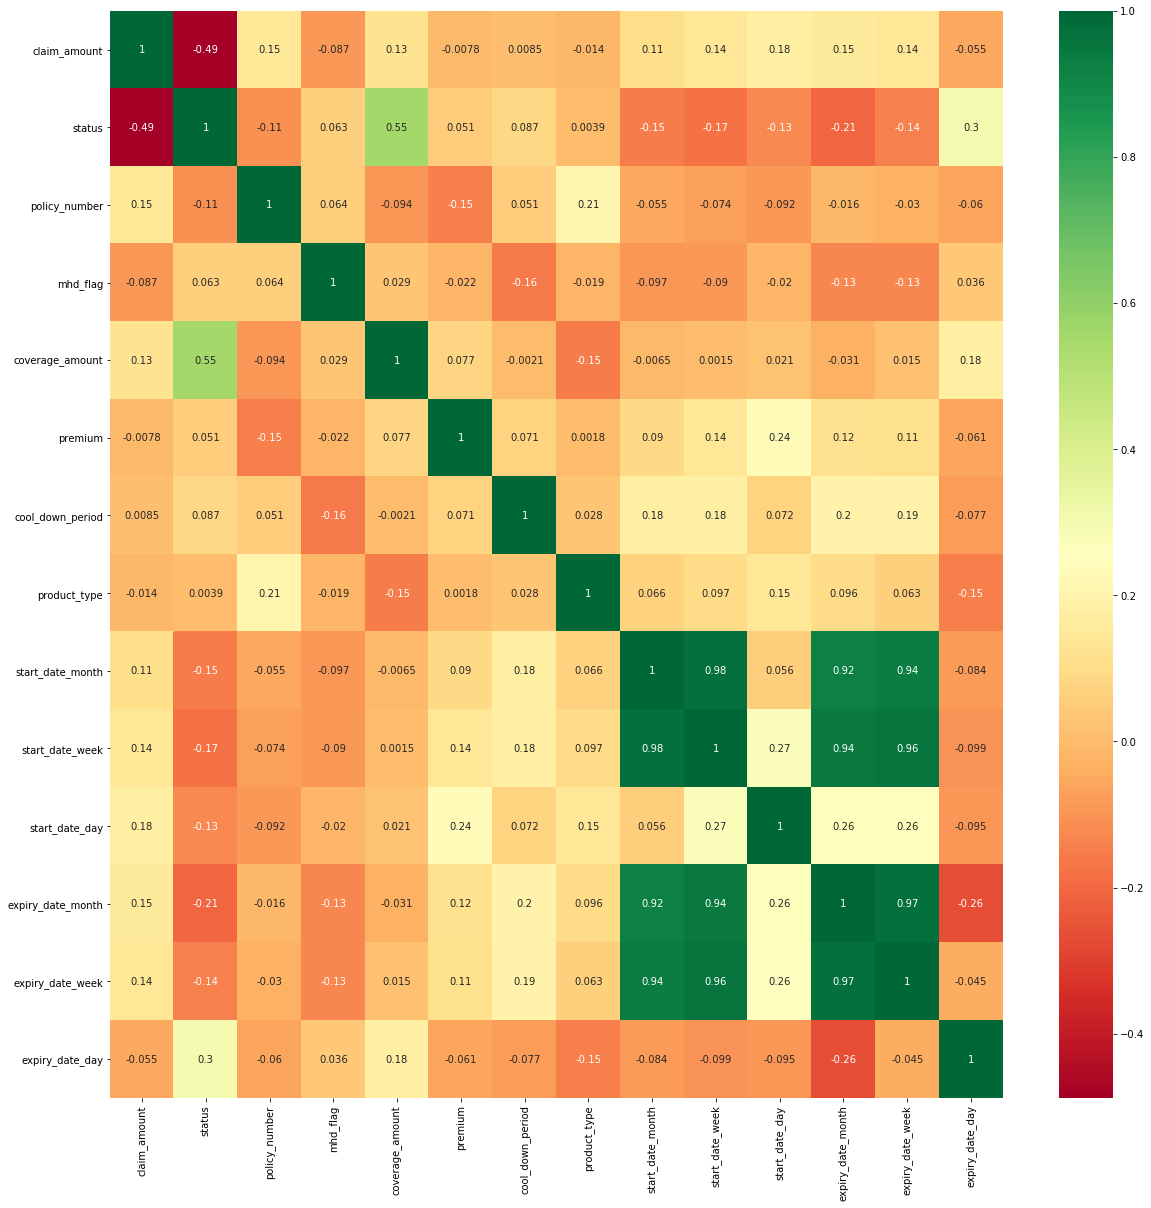

In [195]:
import pandas as pd
import numpy as np
import seaborn as sns
   #target column i.e price range
#get correlations of each features in dataset
corrmat = df1.corr()
top_corr_features = corrmat.index
plt.figure(figsize=(20,20))
#plot heat map
g=sns.heatmap(df1[top_corr_features].corr(),annot=True,cmap="RdYlGn")

In [39]:
from sklearn.datasets import *
from sklearn import tree
from dtreeviz.trees import *
regr = tree.DecisionTreeRegressor(max_depth=2)  # limit depth of tree
diabetes = load_diabetes()
regr.fit(diabetes.data, diabetes.target)
X = diabetes.data[np.random.randint(0, len(diabetes.data)),:]  # random sample from training

viz = dtreeviz(regr,
               diabetes.data, 
               diabetes.target, 
               target_name='value', 
               orientation ='LR',  # left-right orientation
               feature_names=diabetes.feature_names,
               X=X)  # need to give single observation for prediction
              
viz.view() 

In [44]:
diabetes.data

array([[ 0.03807591,  0.05068012,  0.06169621, ..., -0.00259226,
         0.01990842, -0.01764613],
       [-0.00188202, -0.04464164, -0.05147406, ..., -0.03949338,
        -0.06832974, -0.09220405],
       [ 0.08529891,  0.05068012,  0.04445121, ..., -0.00259226,
         0.00286377, -0.02593034],
       ...,
       [ 0.04170844,  0.05068012, -0.01590626, ..., -0.01107952,
        -0.04687948,  0.01549073],
       [-0.04547248, -0.04464164,  0.03906215, ...,  0.02655962,
         0.04452837, -0.02593034],
       [-0.04547248, -0.04464164, -0.0730303 , ..., -0.03949338,
        -0.00421986,  0.00306441]])

In [59]:

# split dataset in features and target variable
feature_cols = ['claim_amount',
                'mhd_flag', 'coverage_amount', 'premium',
                'cool_down_period',
                'product_type',
                'start_date_month',
                'start_date_day', 'expiry_date_month',
                'expiry_date_day']
X = df[feature_cols]  # Features
y = df['status_new']  # Target variable
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,
                                                    random_state=1)  # 70% training and 30% test
# Create Decision Tree classifer object
clf = DecisionTreeClassifier()

# Train Decision Tree Classifer
clf = clf.fit(X_train, y_train)# limit depth of tree
X_1= np.array([list(X.values[np.random.randint(0, len(X))])]) # random sample from training

viz = dtreeviz(clf,
               X_train,
               y_train,
               target_name='policy',
               orientation='LR',  # left-right orientation
               feature_names=feature_cols,
               class_names=["1", "2"] ,
               X=X_1[0])  # need to give single observation for prediction

viz.view()

In [53]:
X_1[0]

array([2.600e+04, 1.000e+00, 4.900e+04, 3.006e+02, 8.700e+01, 2.000e+00,
       5.000e+00, 2.100e+01, 6.000e+00, 1.800e+01])

In [58]:
np.random.randint(0, len(X))

19

In [69]:
viz.save(os.path.join(os.getcwd(),'tree.svg'))

In [67]:
import os 
os.path.join(os.getcwd(),'tree.png')

'D:\\crux\\tree.png'

In [72]:
# import cairo
import rsvg


ModuleNotFoundError: No module named 'rsvg'